# CRZ Data Analysis
Dylan Mondrus and Ryan Fenner

[Link to GitHub](https://github.com/dylanmondrus/dylanmondrus.github.io.git)

# Project Goals

The objective of this project is to assess the impact of the 2025 implementation of New York City's Congestion Relief Zone on traffic volume south of 60th Street.

# Project Dataset

The data we are interested in working with currently is all the data associated with the implementation of the Congestion Relief Zone implemented in January 2025 in New York City. The [MTA Congestion Relief Zone Vehicle Entries: Beginning 2025](https://data.ny.gov/Transportation/MTA-Congestion-Relief-Zone-Vehicle-Entries-Beginni/t6yz-b64h/about_data). I have accessed the data collected by the MTA for the last two months which details the number of entries into the zone at a given time(day, hour, minute, 10 minute interval). This dataset may be good for tracking the trend of entries into the zone over the course of the timeline since it's been implemented. We also have the traffic volume from the [Traffic Volume Counts](https://data.cityofnewyork.us/Transportation/Traffic-Volume-Counts/btm5-ppia/about_data) dataset created by the Department of Transportation.

This may answer questions like: How has rush hour traffic changed since its implementation? How much has traffic volume changed since its implementation? Which entry points have increased their traffic volume since its implementation? These are all good questions but cannot give the full picture of the CRZ's effectiveness unless we get larger and more datasets. I'm looking for similar traffic data from before the CRZ so we can answer the same questions but with a larger timeframe in mind so we can truly visualize the effectiveness.

Currently we have data from 2025 on and from May 27, 2022 and before. While there is a three year gap in the data from 2022 to 2025, we should be able to use regression to calculate expected values for the missing years. Otherwise we will find more datasets to fill in the data. Even so, whether or not the congestion zones affect traffic should be clear based on our analysis of before and after implementation.

# Collaboration Plan

Our collaboration plan is to meet at the library once a week to continue towards completion on the final project. We have created and shared a google colab to work on and update our code together. From now until April 18th we will continue scraping each traffic dataset we find to create good comparisons between them. We also hope to find another dataset from the most current data available. From April 18 to May 8th we will develop our presentation using the key graphs and insights found during the ETL phase.

# ETL (Extraction, Transform, and Load)

We currently have 2 dataset excel files loaded. The 2025 post-congestion zone dataset, and the total traffic volume data prior to 2022. The 2025 dataset contains exact time of tole, vehicle class, entry location, entry region, CRZ entries, and excluded roadway entries. The total traffic dataset contains exact location of detection, direction, and amount of vehicles detected.

# Interesting statistics
- the day with the least amount of entries into the CRZ was Sunday, January 19th.
- The average entries into the CRZ per day is 477,525.
- The detection region with the most entries is Brookyln. This means that Brooklyn has more people driving into lower manhattan than any other region.


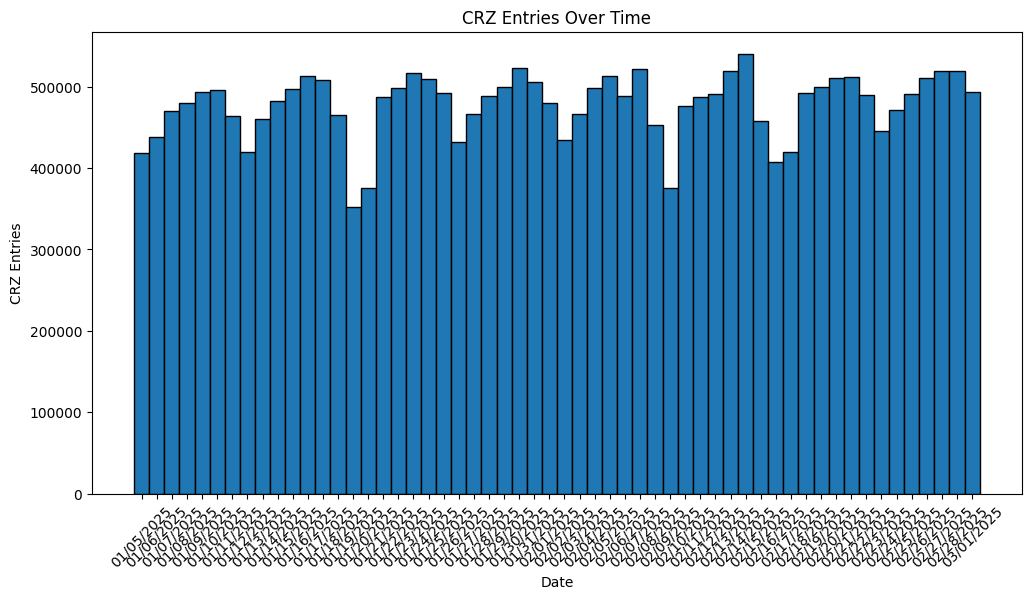

In [ ]:
import matplotlib.pyplot as plt
CRZ_grouped = CRZ_dataset.groupby('Toll Date')['CRZ Entries'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(CRZ_grouped['Toll Date'], CRZ_grouped['CRZ Entries'], width=1.0, edgecolor='black')

plt.xlabel('Date')
plt.ylabel('CRZ Entries')
plt.title('CRZ Entries Over Time')
plt.xticks(rotation=45)

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving MTA_Congestion_Relief_Zone_Vehicle_Entries__Beginning_2025_20250311.csv to MTA_Congestion_Relief_Zone_Vehicle_Entries__Beginning_2025_20250311.csv


In [ ]:
uploaded = files.upload()

Saving Traffic_Volume_Counts_20250311.csv to Traffic_Volume_Counts_20250311.csv


In [ ]:
import pandas as pd
CRZ_dataset = pd.read_csv("MTA_Congestion_Relief_Zone_Vehicle_Entries__Beginning_2025_20250311.csv")
CRZ_dataset.head()

,Toll Date,Toll Hour,Toll 10 Minute Block,Minute of Hour,Hour of Day,Day of Week Int,Day of Week,Toll Week,Time Period,Vehicle Class,Detection Group,Detection Region,CRZ Entries,Excluded Roadway Entries
0,03/01/2025,03/01/2025 11:00:00 PM,03/01/2025 11:50:00 PM,50,23,7,Saturday,02/23/2025,Overnight,4 - Buses,Brooklyn Bridge,Brooklyn,0,0
1,03/01/2025,03/01/2025 11:00:00 PM,03/01/2025 11:50:00 PM,50,23,7,Saturday,02/23/2025,Overnight,TLC Taxi/FHV,West Side Highway at 60th St,West Side Highway,138,1
2,03/01/2025,03/01/2025 11:00:00 PM,03/01/2025 11:50:00 PM,50,23,7,Saturday,02/23/2025,Overnight,TLC Taxi/FHV,West 60th St,West 60th St,201,0
3,03/01/2025,03/01/2025 11:00:00 PM,03/01/2025 11:50:00 PM,50,23,7,Saturday,02/23/2025,Overnight,TLC Taxi/FHV,Queensboro Bridge,Queens,83,0
4,03/01/2025,03/01/2025 11:00:00 PM,03/01/2025 11:50:00 PM,50,23,7,Saturday,02/23/2025,Overnight,TLC Taxi/FHV,Queens Midtown Tunnel,Queens,119,0


# Before and After Data Comparison

In the total traffic volume dataset, we are able to view the traffic of the entire city of New York. We will filter this to data specifically from the congestion zone, and be able to compare the amount of entries between the two datasets.

In [ ]:
total_traffic_dataset = pd.read_csv("Traffic_Volume_Counts_20250311.csv")
total_traffic_dataset.head()

,ID,SegmentID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/09/2012,20.0,10.0,11.0,...,104.0,105.0,147.0,120.0,91.0,83.0,74.0,49.0,42.0,42.0
1,2,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/10/2012,21.0,16.0,8.0,...,102.0,98.0,133.0,131.0,95.0,73.0,70.0,63.0,42.0,35.0
2,3,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/11/2012,27.0,14.0,6.0,...,115.0,115.0,130.0,143.0,106.0,89.0,68.0,64.0,56.0,43.0
3,4,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/12/2012,22.0,7.0,7.0,...,71.0,127.0,122.0,144.0,122.0,76.0,64.0,58.0,64.0,43.0
4,5,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/13/2012,31.0,17.0,7.0,...,113.0,126.0,133.0,135.0,102.0,106.0,58.0,58.0,55.0,54.0


In [ ]:
min_entry_index = CRZ_grouped['CRZ Entries'].idxmin()

min_entry_date = CRZ_grouped.loc[min_entry_index, 'Toll Date']
min_entry_value = CRZ_grouped.loc[min_entry_index, 'CRZ Entries']

print(f"Date with the least CRZ entries: {min_entry_date}")
print(f"Total entries on this day: {min_entry_value}")


Date with the least CRZ entries: 01/19/2025
Total entries on this day: 352701


# Monthly CRZ Comparison

As we can see below, the CRZ exhibits weekly fluctuations in traffic volume. We can use data like this to see if the patterns still exist before CRZ implementation and the change in volume of traffic. We can also look at this data over months or years to see if there is any significant change in traffic.

In [ ]:
CRZ_grouped.describe()

,CRZ Entries
count,56.000000
mean,477525.589286
std,39955.043192
min,352701.000000
25%,462850.250000
50%,489641.500000
75%,506074.500000
max,540803.000000


In [ ]:
CRZ_street_group = CRZ_dataset.groupby("Detection Region")["CRZ Entries"]
CRZ_street_group.describe()

,count,mean,std,min,25%,50%,75%,max
Detection Region,,,,,,,,
Brooklyn,193536.0,33.493763,55.533726,0.0,0.0,2.0,46.0,335.0
East 60th St,48384.0,87.810681,126.722694,0.0,3.0,13.0,162.0,587.0
FDR Drive,48384.0,57.898603,96.932330,0.0,0.0,2.0,95.0,427.0
New Jersey,96768.0,47.070468,86.889808,0.0,1.0,6.0,51.0,599.0
Queens,96768.0,43.246094,66.912178,0.0,1.0,4.0,71.0,374.0
West 60th St,48384.0,44.263166,68.262170,0.0,2.0,7.0,57.0,370.0
West Side Highway,48384.0,48.111028,94.224227,0.0,0.0,2.0,60.0,578.0
